# COMP 7150 Midterm Exam

WRITE YOUR NAME HERE: Nitya Kanthi Nadimpalli

---

The instructor will explictly review these policies at the beginning of the exam. If you have questions about the exam policy, you must ask the instructor for clarification.

Exam policy:
+ You may view materials that are available on Canvas.
+ To analyze or visualize data, you may only use code that we have discussed in this course.  Using code or methods that have not been taught is considered cheating.  There are exceptions that I may allow. But you will have to get approvals from me first. 
+ You may not view other materials (code/methodologies/etc.) from other sources. You may not get help from anyone other than the instructor. A violation is considered cheating.  Cheating results in failing the course (getting an F).

Grading policy: to get most of the points on each problem, follow this guidline:
+ If the problem ask question(s), you must answer the question(s) in English.  Further, you will need perform an analysis to justify your answer.
+ Your analysis consists of code and possibly reasoning to support your answer.
+ If I ask for specific types of analyses or procedures, to get points, you have to use those.  If I do not ask for specific technical procedures, you are open to use anything we've discussed in this course.

There are 9 questions.  Each is worth 12 points.  Anything over 100 points is bonus.

---


In this exam, you will use the "Mall_Customers" dataset.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas

customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
customers.sample(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
169,170,Male,32,87,63
144,145,Male,25,77,12


---

**Problem 1**

Visualize the distribution of annual incomes.



In [4]:
import seaborn
from matplotlib import pyplot

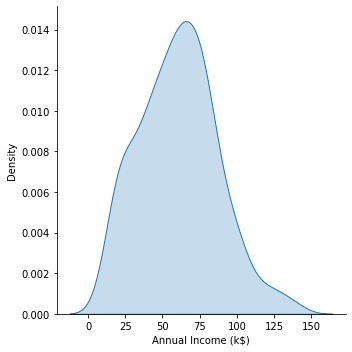

In [14]:
seaborn.displot(data=customers, x='Annual Income (k$)', kind='kde', fill=True, height=5)

---

**Problem 2**

Is the distribution of annual incomes normal?  Explain both visually and by using a statistical test.

In [16]:
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(customers['Annual Income (k$)'])
print(round(test_pvalue, 4))

0.0035


In [18]:
from numpy.random import normal
theoretical = normal(customers['Annual Income (k$)'].mean(), customers['Annual Income (k$)'].std(), 500)

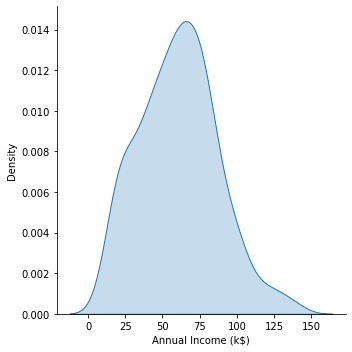

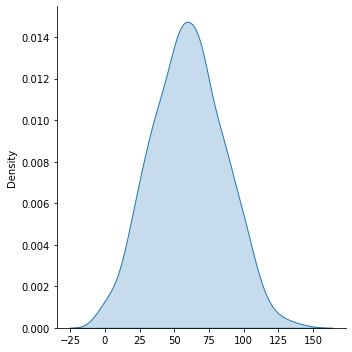

In [20]:
from seaborn import displot
displot(data=customers, x='Annual Income (k$)', kind='kde', fill=True, height=5)
displot(x=theoretical, kind='kde', fill=True, height=5)

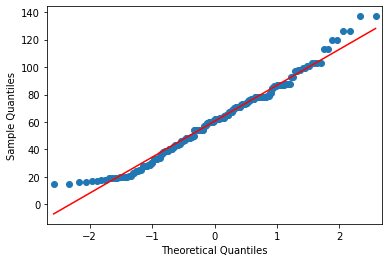

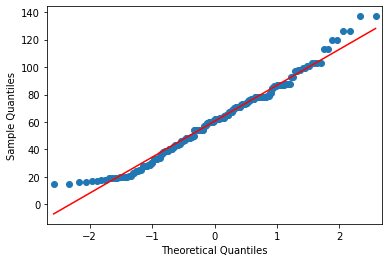

In [21]:
from statsmodels.api import qqplot
qqplot(customers['Annual Income (k$)'], line='s')

---

**Problem 3**

What is the test hypothesis of the t-test?  Explain your conclusion when a t-test between two series A and B returns a p-value of 0.003.

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [74]:
customers.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [75]:
data=customers[customers['Gender']=='Male']['Annual Income (k$)']
info=customers[customers['Gender']=='Female']['Annual Income (k$)']

In [77]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    shapiro_test = shapiro(data)
    fig = qqplot(data, line='s')
    return round(shapiro_test.statistic,4)

0.9784

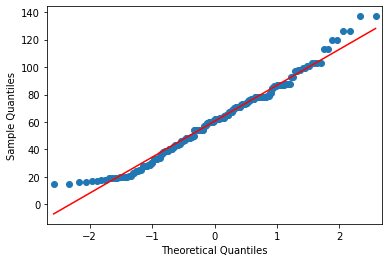

In [81]:
test_for_normality(customers['Annual Income (k$)'])

---

**Problem 4**

Create a dataframe that contains all data points with gender "Male", and another dataframe that contains all data points with gender "Female".


In [27]:
data=customers[customers['Gender'] == 'Male']
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
data=customers[customers['Gender'] == 'Female']
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


---

**Problem 5**

Is there a significant difference between males' and females' annual incomes?


In [33]:
customers.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


---

**Problem 6**

Given this dataframe:
```python
customers = pandas.read_csv('../Datasets/Mall_Customers.csv')
```

Create a new column in this dataframe called `income_class`, based on this definition:
+ `low` - if the annual income is less than 40k.
+ `middle` - if the annual income is between 40k and 70k.
+ `high` - if the annual income is more than 70k.

In [45]:
def row_processor(row):
    value = row['Annual Income (k$)']
    if value < 40:
        income_class = 'low'
    elif value > 70:
        income_class = 'high'
    else:
        income_class = 'middle'
    return income_class

In [49]:
customers['income_class'] = customers.apply(row_processor, axis=1)
customers[['income_class']].sample(10)

,income_class
87,middle
95,middle
181,high
22,low
86,middle
109,middle
194,high
197,high
124,middle
3,low


---

**Problem 7**

A person with a high spending score more likely spends the money to buy things.  The average spending scores of low-income, middle-income, and high-income people are actually very similar (around 50).

But there are similarities and differences beyond this average value.

Compare the similarities and differences in spending between these three groups of people. 

In [86]:
customers.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_class,clusters
35,36,Female,21,33,81,low,1
89,90,Female,50,58,46,middle,3
86,87,Female,55,57,58,middle,0
33,34,Male,18,33,92,low,1
69,70,Female,32,48,47,middle,4
194,195,Female,47,120,16,high,2
67,68,Female,68,48,48,middle,0
34,35,Female,49,33,14,low,2
106,107,Female,66,63,50,middle,0
75,76,Male,26,54,54,middle,4


In [89]:
customers.groupby('income_class')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
income_class,,,,,,,,
high,74.0,50.189189,33.624712,1.0,16.25,51.5,83.00,97.0
low,46.0,49.739130,31.478695,3.0,19.25,50.5,76.75,99.0
middle,80.0,50.475000,8.390735,29.0,45.75,50.0,55.00,91.0


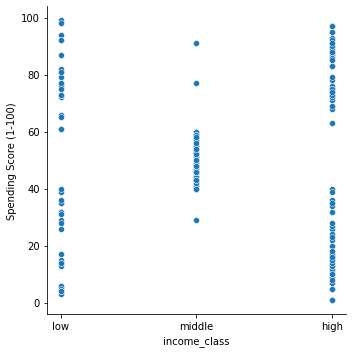

In [91]:
relplot(data=customers, x='income_class', y='Spending Score (1-100)', height=5)

---

**Problem 8**

This code will group the data into 5 different clusters, based on age and spending score.

```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=2024)
X = customers[['Age','Spending Score (1-100)']]
model.fit(X)
```

Show that incomes of the people in clusters 1 and 4 are very similar.

In [50]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=2024)
X = customers[['Age','Spending Score (1-100)']]
model.fit(X)

KMeans(n_clusters=5, random_state=2024)

In [54]:
model.labels_

array([4, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 4, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 4, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 0, 1, 3, 4,
       3, 4, 0, 4, 4, 4, 0, 4, 4, 0, 3, 3, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       3, 0, 4, 4, 0, 3, 0, 0, 0, 4, 3, 3, 4, 3, 0, 4, 0, 3, 4, 3, 0, 4,
       4, 3, 0, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 4, 4, 4, 0, 0, 3, 0, 4, 3, 4, 1, 4, 1, 3, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 4, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       2, 1], dtype=int32)

In [55]:
customers['clusters']=model.labels_

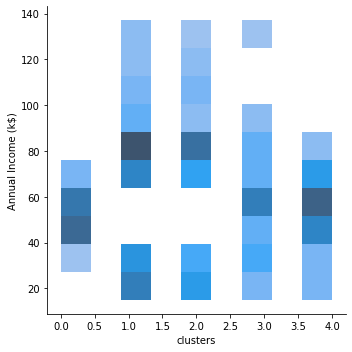

In [72]:
from seaborn import relplot, displot, catplot
displot(data=customers, x='clusters', y='Annual Income (k$)', kind='hist', height=5)

---

**Problem 9**

Suppose you need to provide business analytics to a company, do you recommend your company to attract people in cluster 1 or cluster 4?

I suppose to recommend to attract cluster 4 people beacuse of average annual income 

In [92]:
c1=customers[customers['clusters']=='1']['Annual Income (k$)']
c2=customers[customers['clusters']=='2']['Annual Income (k$)']
c3=customers[customers['clusters']=='3']['Annual Income (k$)']
c4=customers[customers['clusters']=='4']['Annual Income (k$)']

In [93]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(c1):
    shapiro_test = shapiro(c1)
    fig = qqplot(c1, line='s')
    return round(shapiro_test.statistic,4)

0.889

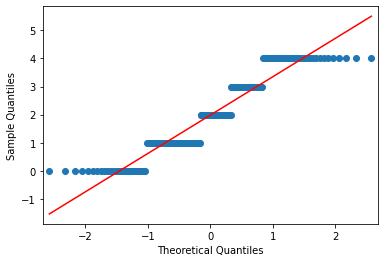

In [98]:
test_for_normality(customers['clusters'])

In [99]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(c2):
    shapiro_test = shapiro(c2)
    fig = qqplot(c2, line='s')
    return round(shapiro_test.statistic,4)

0.889

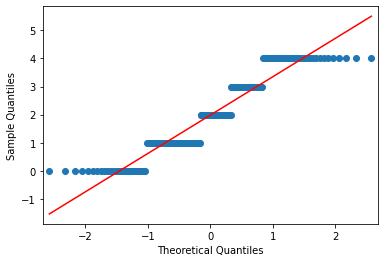

In [100]:
test_for_normality(customers['clusters'])